In [38]:
# pulling from Oracle transaction database at work -- I ran it once, you should read 2 cells down to pull from local drive
import cx_Oracle
import pandas as pd
import yaml
import os 

cred = yaml.load(open(os.path.expanduser('prod_cred.yml')))
conn = cx_Oracle.connect(cred['USER'] + '/' + cred['PW'] + '@PROD')
base = pd.io.sql.read_sql(
    """
    select full_address, assessed_land_value, assessed_total_value, assessed_imp_value, 
        zip, 
        full_bathroom_count + partial_bathroom_count * 0.5 bath,
        bedroom_count as bed,
        2009 - year_built as age,
        stories,
        garage_type,
        parking,
        total_units,
        pool,
        fireplace,
        property_type,
        building_area,
        lot_size,
        fidelity_latitude,
        fidelity_longitude
        
        from bdr.fidelity_assessment_record f
        JOIN bdr.zipcode_city_mapping zcm ON f.zip = zcm.zipcode
        WHERE zcm.mls_table = 'MLS_CA_BA'
        and assessment_year = 2009
        and lot_size > 0
    ORDER BY address_id
    """, conn)

base = base.drop('FULL_ADDRESS', axis = 1)

base.to_csv(path_or_buf = 'base.csv')
lookup.to_csv('lookup.csv')

In [39]:
base.to_csv(path_or_buf = 'base.csv')
lookup.to_csv('lookup.csv')

In [40]:
from sklearn.cross_validation import train_test_split

base_l, base_s = train_test_split(base, test_size = 1000, random_state = 32)
base_s = pd.DataFrame(base_s, columns = base.columns)
base_s.to_csv('base_s.csv')

In [106]:
import pandas as pd

try:
    lookup = pd.read_csv('lookup.csv', index_col = 'Unnamed: 0')
    print lookup.head()
except:
    print 'You have no access to the lookup file, which is used for troubleshooting during the exploratory phase only.'

  full_address
0  1529 3RD ST
1  1525 3RD ST
2  1523 3RD ST
3  1519 3RD ST
4  1507 3RD ST


#READ THIS
The full data (base.csv) is too big for GitHub, so I sample 1000 random rows into base_s.csv (using train_test_split) with the step above. If using the full data (not on GitHub), run everything below; if using the sample data, adjust the cell below to read from base_s.csv instead of base.csv.

For most applications, do not run the 2 cells above this one.

I also create and import an address lookup file to help with my exploration. This is not provided on GitHub.

In [93]:
import pandas as pd
from seaborn import plt
import seaborn as sns
%matplotlib inline

base = pd.read_csv('base.csv')
print len(base)
base = base.drop('Unnamed: 0', axis = 1)
base.head().T.to_csv('data_example.csv')
base.head()

1558278


,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
0,15464,46393,61857,94607,1.0,2,119,2,G,0,0,NaN,NaN,NaN,572,2500,37.803152,-122.296821
1,90000,210000,300000,94607,0.5,2,119,2,G,0,0,NaN,NaN,NaN,572,2500,37.803141,-122.296767
2,17487,125805,143292,94607,2.0,4,119,2,NaN,0,0,NaN,NaN,NaN,1672,2500,37.803136,-122.296740
3,27290,56096,83386,94607,1.5,4,119,2,NaN,0,0,NaN,NaN,NaN,1144,2500,37.803125,-122.296685
4,18193,37903,56096,94607,2.0,4,129,2,G,0,1,NaN,NaN,NaN,1594,2500,37.803093,-122.296523


In [3]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSESSED_LAND_VALUE,1558278,173641.223270,306787.064111,0.000000,46616.000000,101761.000000,206400.000000,1.134974e+08
ASSESSED_TOTAL_VALUE,1558278,204622.388653,239538.804009,0.000000,83766.000000,160509.000000,261788.500000,7.808417e+07
ASSESSED_IMP_VALUE,1558278,378263.611922,471608.242032,0.000000,144973.250000,281639.000000,478592.750000,1.134974e+08
ZIP,1558278,94742.482704,392.571872,93109.000000,94534.000000,94597.000000,95051.000000,9.600100e+04
BATH,1558278,1.985419,0.946865,0.000000,1.000000,2.000000,2.500000,2.000000e+01
BED,1558278,2.880011,1.392383,0.000000,2.000000,3.000000,4.000000,2.000000e+01
AGE,1466427,44.196920,24.995731,0.000000,25.000000,43.000000,58.000000,1.990000e+02
PARKING,1558278,1.272550,11.772471,0.000000,0.000000,1.000000,2.000000,2.700000e+03
TOTAL_UNITS,1558278,0.215387,0.933769,0.000000,0.000000,0.000000,0.000000,3.000000e+02
BUILDING_AREA,1558278,1773.018450,4366.809136,0.000000,1185.000000,1560.000000,2094.000000,3.074000e+05


In [246]:
base[base.LOT_SIZE < base.BUILDING_AREA].head()
# test = pd.concat([lookup, base[(base.LOT_SIZE < base.BUILDING_AREA) & (base.LOT_SIZE < 300)]], join = 'inner', axis = 1)
test = pd.concat([lookup, base[base.LOT_SIZE < base.BUILDING_AREA / 10]], join = 'inner', axis = 1)
test2 = test.sort(columns = ['LOT_SIZE'], ascending = False)
test2.head(100)

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
707494,1083 CENTURY CT,64350,199689,264039,94558,3.5,4,33,NaN,Y,2,0,NaN,Y,NaN,268207,8276,38.308789,-122.333504
1439241,1313 LOMBARDI AVE,13321,75941,89262,94954,2.0,3,43,1,NaN,0,1,NaN,1,NaN,86200,6014,38.242227,-122.614560
739481,2719-2721 MCALLISTER ST,371598,649691,1021289,94118,5.0,8,21,2,NaN,0,0,NaN,NaN,NaN,36994,3438,37.775361,-122.455852
817907,314-316 BRAZIL AVE,145710,517312,663022,94112,5.0,6,21,2,NaN,0,0,NaN,NaN,NaN,31004,2500,37.723443,-122.431189
1504138,1017 ADDISON CIR,224943,157459,382402,94952,3.0,3,10,2,NaN,0,1,NaN,NaN,NaN,24464,1827,38.227626,-122.623411
429671,1300 GALAXY WAY,56342,104412,160754,94520,0.0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,22188,1701,37.976502,-122.048014
409147,1717 SOLANO WAY,102000,213180,315180,94520,0.0,0,30,NaN,NaN,0,0,NaN,NaN,NaN,22225,1500,37.995328,-122.051985
409151,1717 SOLANO WAY,37938,113824,151762,94520,0.0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,22225,1500,37.995328,-122.051985
409150,1717 SOLANO WAY,37938,113824,151762,94520,0.0,0,30,NaN,NaN,0,0,NaN,NaN,NaN,22225,1500,37.995328,-122.051985
409149,1717 SOLANO WAY,37230,79135,116365,94520,0.0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,22225,1500,37.995328,-122.051985


In [239]:
def acres_finder(num):
    import re
    if re.search('.+\...$', str(num)):
        return 1

test = base.LOT_SIZE.map(acres_finder)
base[test == 1].sort(columns = 'LOT_SIZE', ascending = False).head(10)

,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
800627,67611,118335,185946,94110,2.0,0,94,2,NaN,0,0,NaN,NaN,NaN,1505,1331.53,37.748606,-122.408093
655042,149199,246616,395815,94952,0.0,0,NaN,NaN,NaN,0,2,NaN,NaN,NaN,0,483.91,38.154225,-122.714554
1283990,173551,419527,593078,94571,2.0,2,4,NaN,G,2,0,NaN,NaN,NaN,2680,474.97,38.198221,-121.783699
1539193,228943,51585,280528,94956,0.0,0,NaN,NaN,NaN,0,2,NaN,NaN,NaN,0,471.25,0.000000,0.000000
652103,123381,614385,737766,94952,3.0,3,18,NaN,Y,3,2,NaN,NaN,NaN,4319,438.25,38.202801,-122.779729
655052,295519,928575,1224094,94952,0.0,0,NaN,NaN,NaN,0,4,NaN,NaN,NaN,0,425.81,0.000000,0.000000
1538533,202565,0,202565,94558,0.0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,365.37,38.338387,-122.295914
1532710,7338268,0,7338268,95120,0.0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,363.91,37.195324,-121.808845
1479379,1771347,1820700,3592047,95404,0.0,0,NaN,NaN,NaN,0,1,NaN,NaN,NaN,0,341.62,38.388552,-122.664831
1246067,427891,1433421,1861312,95037,10.5,9,54,1,C,0,0,NaN,NaN,NaN,9863,336.88,37.139952,-121.734676


In [ ]:
# looks like lot size has mixed units (feet, acres): I'll attempt to convert acres to feet using the following rule:
base.LOT_SIZE == base.LOT_SIZE.apply(lambda x: x * 43560 if x < 100 and x < BUILDING_AREA)

In [ ]:
base['landval_perc'] = base.ASSESSED_LAND_VALUE / base.ASSESSED_IMP_VALUE
base['lot_perc'] = 1 - base.BUILDING_AREA / base.LOT_SIZE
base.lot_perc = base.lot_perc.apply(lambda x: x == 0 if x < -1 else x)

## Zero-handling Analysis

In [94]:
# how bad are the zeros?

for i in base.columns:
    print i + ': ' + str((base[i] == 0).sum())

ASSESSED_LAND_VALUE: 1694
ASSESSED_TOTAL_VALUE: 41902
ASSESSED_IMP_VALUE: 1669
ZIP: 0
BATH: 98502
BED: 180468
AGE: 486
STORIES: 0
GARAGE_TYPE: 0
PARKING: 650849
TOTAL_UNITS: 1314170
POOL: 0
FIREPLACE: 0
PROPERTY_TYPE: 0
BUILDING_AREA: 73916
LOT_SIZE: 0
FIDELITY_LATITUDE: 9081
FIDELITY_LONGITUDE: 9081


Large # of properties with no bath, no bed, have to check if it's right or if it's studio.

In [125]:
print zip(lookup.iloc[9], lookup.iloc[19], lookup.iloc[20], lookup.iloc[21], lookup.iloc[22]), lookup.iloc[1558181]
base[base.BED == 0].head()

[('412 BRUSH ST', '373 4TH ST', '373 4TH ST', '373 4TH ST', '373 4TH ST')] full_address    1311 65TH ST
Name: 1558181, dtype: object


,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
9,9139,11251,20390,94607,0,0,119,NaN,NaN,0,0,NaN,NaN,NaN,736,1875,37.800795,-122.281557
19,139200,324800,464000,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1700,8234,37.797090,-122.273072
20,106200,247800,354000,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1500,8234,37.797090,-122.273072
21,24798,235588,260386,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1700,8234,37.797090,-122.273072
22,156000,364000,520000,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1850,8234,37.797090,-122.273072


In [127]:
pd.concat([lookup, base[base.BATH == 0]], join = 'inner', axis = 1).head()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
9,412 BRUSH ST,9139,11251,20390,94607,0,0,119,NaN,NaN,0,0,NaN,NaN,NaN,736,1875.00,37.800795,-122.281557
29,311 4TH ST,87900,205100,293000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1072,1.03,37.796396,-122.271534
30,126 4TH ST,115500,269500,385000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1157,1.03,37.795007,-122.267178
31,311 4TH ST,105900,247100,353000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1061,1.03,37.796396,-122.271534
32,311 4TH ST,123000,287000,410000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1115,1.03,37.796396,-122.271534


Looking up a few cases reveals that 0 bed/bath tends to be error data, with no immediate pattern (e.g. small, big homes and condos all have this problem). Going to drop them all and not worry about them.

In [134]:
pd.concat([lookup, base[base.STORIES == '0']], axis=1, join = 'inner').head()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
845386,1240 MOUNTAIN VIEW RD,458873,143395,602268,93109,1.75,2,50,0,NaN,0,0,NaN,1,NaN,1344,9148,34.410187,-119.718668
845387,1250 MOUNTAIN VIEW RD,205110,128999,334109,93109,1.75,4,46,0,NaN,0,0,NaN,1,NaN,1542,10019,34.410228,-119.718885
845388,1260 MOUNTAIN VIEW RD,26302,54269,80571,93109,1.75,3,51,0,C,0,0,NaN,NaN,NaN,1244,9583,34.410269,-119.719100
845389,1268 MOUNTAIN VIEW RD,26301,57554,83855,93109,2.00,3,50,0,NaN,0,0,NaN,1,NaN,1242,12632,34.410302,-119.719273
845390,1276 MOUNTAIN VIEW RD,518000,196000,714000,93109,1.75,2,52,0,A,0,0,NaN,1,NaN,1205,13504,34.410335,-119.719446


Stories == 0 seems like bad data (a lot of Santa Barbara addresses, which shouldn't be in here). Remove. In any case, not apparent what the right number should be.

## Error-handling Analysis

In [128]:
len(base) - base.count() # how many errors?

ASSESSED_LAND_VALUE           0
ASSESSED_TOTAL_VALUE          0
ASSESSED_IMP_VALUE            0
ZIP                           0
BATH                          0
BED                           0
AGE                       91851
STORIES                  500500
GARAGE_TYPE              405435
PARKING                       0
TOTAL_UNITS                   0
POOL                    1426877
FIREPLACE               1342550
PROPERTY_TYPE           1485611
BUILDING_AREA                 0
LOT_SIZE                      0
FIDELITY_LATITUDE             0
FIDELITY_LONGITUDE            0
dtype: int64

In [130]:
test = base[base.AGE.isnull()]
pd.concat([lookup, test], axis = 1, join = 'inner').tail()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
1558271,881 JONES ST,900,2100,3000,94710,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,200,37.875534,-122.298624
1558274,6000 GRIZZLY PEAK BLVD,337,0,337,94611,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,809,37.852437,-122.208045
1558275,GRIZZLY PEAK BLVD,146112,2526,148638,94611,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,17071,37.852205,-122.207129
1558276,9TH ST,2665,1142,3807,94710,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,2410,37.869705,-122.293922
1558277,2333 VINE ST,29321,4950,34271,94708,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,4037,37.881073,-122.263458


Missing Age data appears non-trivial; cross-reference of test cases with other data sources shows there should be an age. Raw data probably not right, impute by removing records with missing-age data

In [131]:
print base.STORIES.value_counts()

1       387807
1.0     285379
2       193544
2.0     102671
1.5      60710
3        11036
3.0       5048
2+B       3455
0         1972
2.5       1765
1+B       1304
4.0       1258
2+         468
3+B        385
5.0        272
4          179
25.0       149
11.0       118
3.5         53
12.0        53
17.0        30
1.5         24
7.0         17
5           13
8.0         13
6.0         12
20.0        10
6            6
8            5
4.5          3
93.0         2
10.0         2
9.0          2
2.5          2
12           2
31.0         1
9            1
11           1
S/L          1
20           1
7            1
15           1
6.5          1
23.0         1
dtype: int64


Have to clean up the '+B' and convert to float. Not sure what 0.5 means but roll with it

In [139]:
pd.concat([lookup, base[base.STORIES.isnull()]], join = 'inner', axis = 1).tail(5)

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
1558273,6000 GRIZZLY PEAK BLVD,207728,629820,837548,94611,3,3,38,NaN,NaN,0,0,NaN,NaN,NaN,1925,16842,37.852437,-122.208045
1558274,6000 GRIZZLY PEAK BLVD,337,0,337,94611,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,809,37.852437,-122.208045
1558275,GRIZZLY PEAK BLVD,146112,2526,148638,94611,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,17071,37.852205,-122.207129
1558276,9TH ST,2665,1142,3807,94710,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,2410,37.869705,-122.293922
1558277,2333 VINE ST,29321,4950,34271,94708,0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,4037,37.881073,-122.263458


Found examples of 1- and 2-storey buildings which are null in my data, looks like it's due to outdated raw data, so removing. It looks particularly ill-defined for condos and multi-family residences.

In [129]:
base.PROPERTY_TYPE.value_counts()

SFR    42063
PUD    12089
CND     9549
MFD     6318
RES     1680
2ND      934
MFG       25
MOH        4
LAN        3
COM        1
AGR        1
dtype: int64

PROPERTY_TYPE does not look useful, the missing data appears to be non-trivial

In [143]:
print base.GARAGE_TYPE.value_counts()
print len(base[base.GARAGE_TYPE.isnull()])

G    736371
Y    357703
C     34295
V     19365
M      4455
O       322
A       273
D        55
B         2
N         2
dtype: int64
405435


In [144]:
print base.POOL.value_counts()
print len(base[base.POOL.isnull()])

P    122689
B      7537
S      1154
H        21
dtype: int64
1426877


In [145]:
print base.FIREPLACE.value_counts()
print len(base[base.FIREPLACE.isnull()])

Y      112459
1.0     60897
1       30419
2.0      6787
2        3599
3.0       836
3         559
4.0        79
4          65
5.0        12
5           6
6           4
6.0         2
7.0         1
9.0         1
7           1
9           1
dtype: int64
1342550


In [146]:
print base.TOTAL_UNITS.value_counts()
print len(base[base.TOTAL_UNITS.isnull()])

0     1314170
1      192791
2       32722
4       11340
3        6567
5         157
6         103
8          71
7          45
10         43
9          31
12         25
11         18
16         12
32         11
...
111    1
37     1
109    1
100    1
99     1
98     1
76     1
72     1
71     1
66     1
64     1
48     1
47     1
254    1
43     1
Length: 82, dtype: int64
0


In [148]:
pd.concat([lookup, base[base.TOTAL_UNITS.isnull()]], join = 'inner', axis = 1).tail(5)
pd.concat([lookup, base[base.TOTAL_UNITS == 111]], join = 'inner', axis = 1).tail(5)

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
1510456,8200 FOOTHILL RANCH RD,449888,489253,939141,95404,3,3,22,1,NaN,0,111,NaN,1,NaN,2614,9.67,38.519323,-122.677983


##Processing

In [65]:
basef = base[base.ASSESSED_TOTAL_VALUE > 0] # remove Land
basef = basef[basef.FIDELITY_LATITUDE > 0] # remove properties with no lat/long information
basef = basef[basef.ASSESSED_LAND_VALUE > 0] # remove properties with no land value
basef = basef[basef.BUILDING_AREA > 0] # remove properties with no land value
basef = basef[basef.BED > 0]
basef = basef[basef.BATH > 0]
basef = baseff[basef.STORIES > 0]

for i in base.columns:
    print i + ': ' + str((base[i] == 0).sum())

ASSESSED_LAND_VALUE: 0
ASSESSED_TOTAL_VALUE: 0
ASSESSED_IMP_VALUE: 0
ZIP: 0
BATH: 30309
BED: 112002
AGE: 430
STORIES: 0
GARAGE_TYPE: 0
PARKING: 576226
TOTAL_UNITS: 1253660
POOL: 0
FIREPLACE: 0
PROPERTY_TYPE: 0
BUILDING_AREA: 0
LOT_SIZE: 0
FIDELITY_LATITUDE: 0
FIDELITY_LONGITUDE: 0


In [70]:
base = base[base.AGE.notnull()]

base = base[base.STORIES != 'S/L']
base.STORIES = base.STORIES.replace(r'\+B*', '', regex = True)
base.STORIES = base.STORIES.astype(float)
print base.STORIES.value_counts()

## Setting X up plus PCA

In [13]:
# creating advanced metrics, then defining which I'll use to model

metrics = ['ASSESSED_IMP_VALUE',
           'landval_perc',
           'BED',
           'BATH',
           'AGE',
           'STORIES',
           'GARAGE_TYPE',
           'PARKING',
           'TOTAL_UNITS',
           'POOL',
           'FIREPLACE',
           'BUILDING_AREA',
           'lot_perc']

X = base[metrics]
base[metrics].head()

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,BUILDING_AREA,lot_perc
0,61857,0.249996,2,1.0,119,2,G,0,0,NaN,NaN,572,0.7712
1,300000,0.300000,2,0.5,119,2,G,0,0,NaN,NaN,572,0.7712
2,143292,0.122038,4,2.0,119,2,NaN,0,0,NaN,NaN,1672,0.3312
3,83386,0.327273,4,1.5,119,2,NaN,0,0,NaN,NaN,1144,0.5424
4,56096,0.324319,4,2.0,129,2,G,0,1,NaN,NaN,1594,0.3624


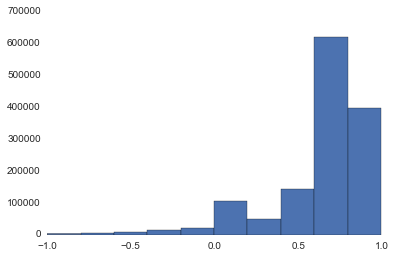

In [14]:
base.lot_perc.hist()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366991 entries, 0 to 1558273
Data columns (total 13 columns):
ASSESSED_IMP_VALUE    1366991 non-null float64
landval_perc          1366991 non-null float64
BED                   1366991 non-null int64
BATH                  1366991 non-null float64
AGE                   1358444 non-null float64
STORIES               950996 non-null object
GARAGE_TYPE           1131047 non-null object
PARKING               1366991 non-null int64
TOTAL_UNITS           1366991 non-null int64
POOL                  129882 non-null object
FIREPLACE             208545 non-null object
BUILDING_AREA         1366991 non-null int64
lot_perc              1366991 non-null object
dtypes: float64(4), int64(4), object(5)

In [22]:
X.AGE

0     119
1     119
2     119
3     119
4     129
5      59
6     103
7     101
10    113
11    113
12     89
13    120
14    113
16    118
17    118
...
1558248    50
1558249    50
1558250    50
1558251    50
1558252    50
1558253    92
1558255    46
1558259    58
1558261    43
1558262    43
1558263    43
1558264    43
1558268    14
1558272    88
1558273    38
Name: AGE, Length: 1366991, dtype: float64

AttributeError: max must be larger than min in range parameter.

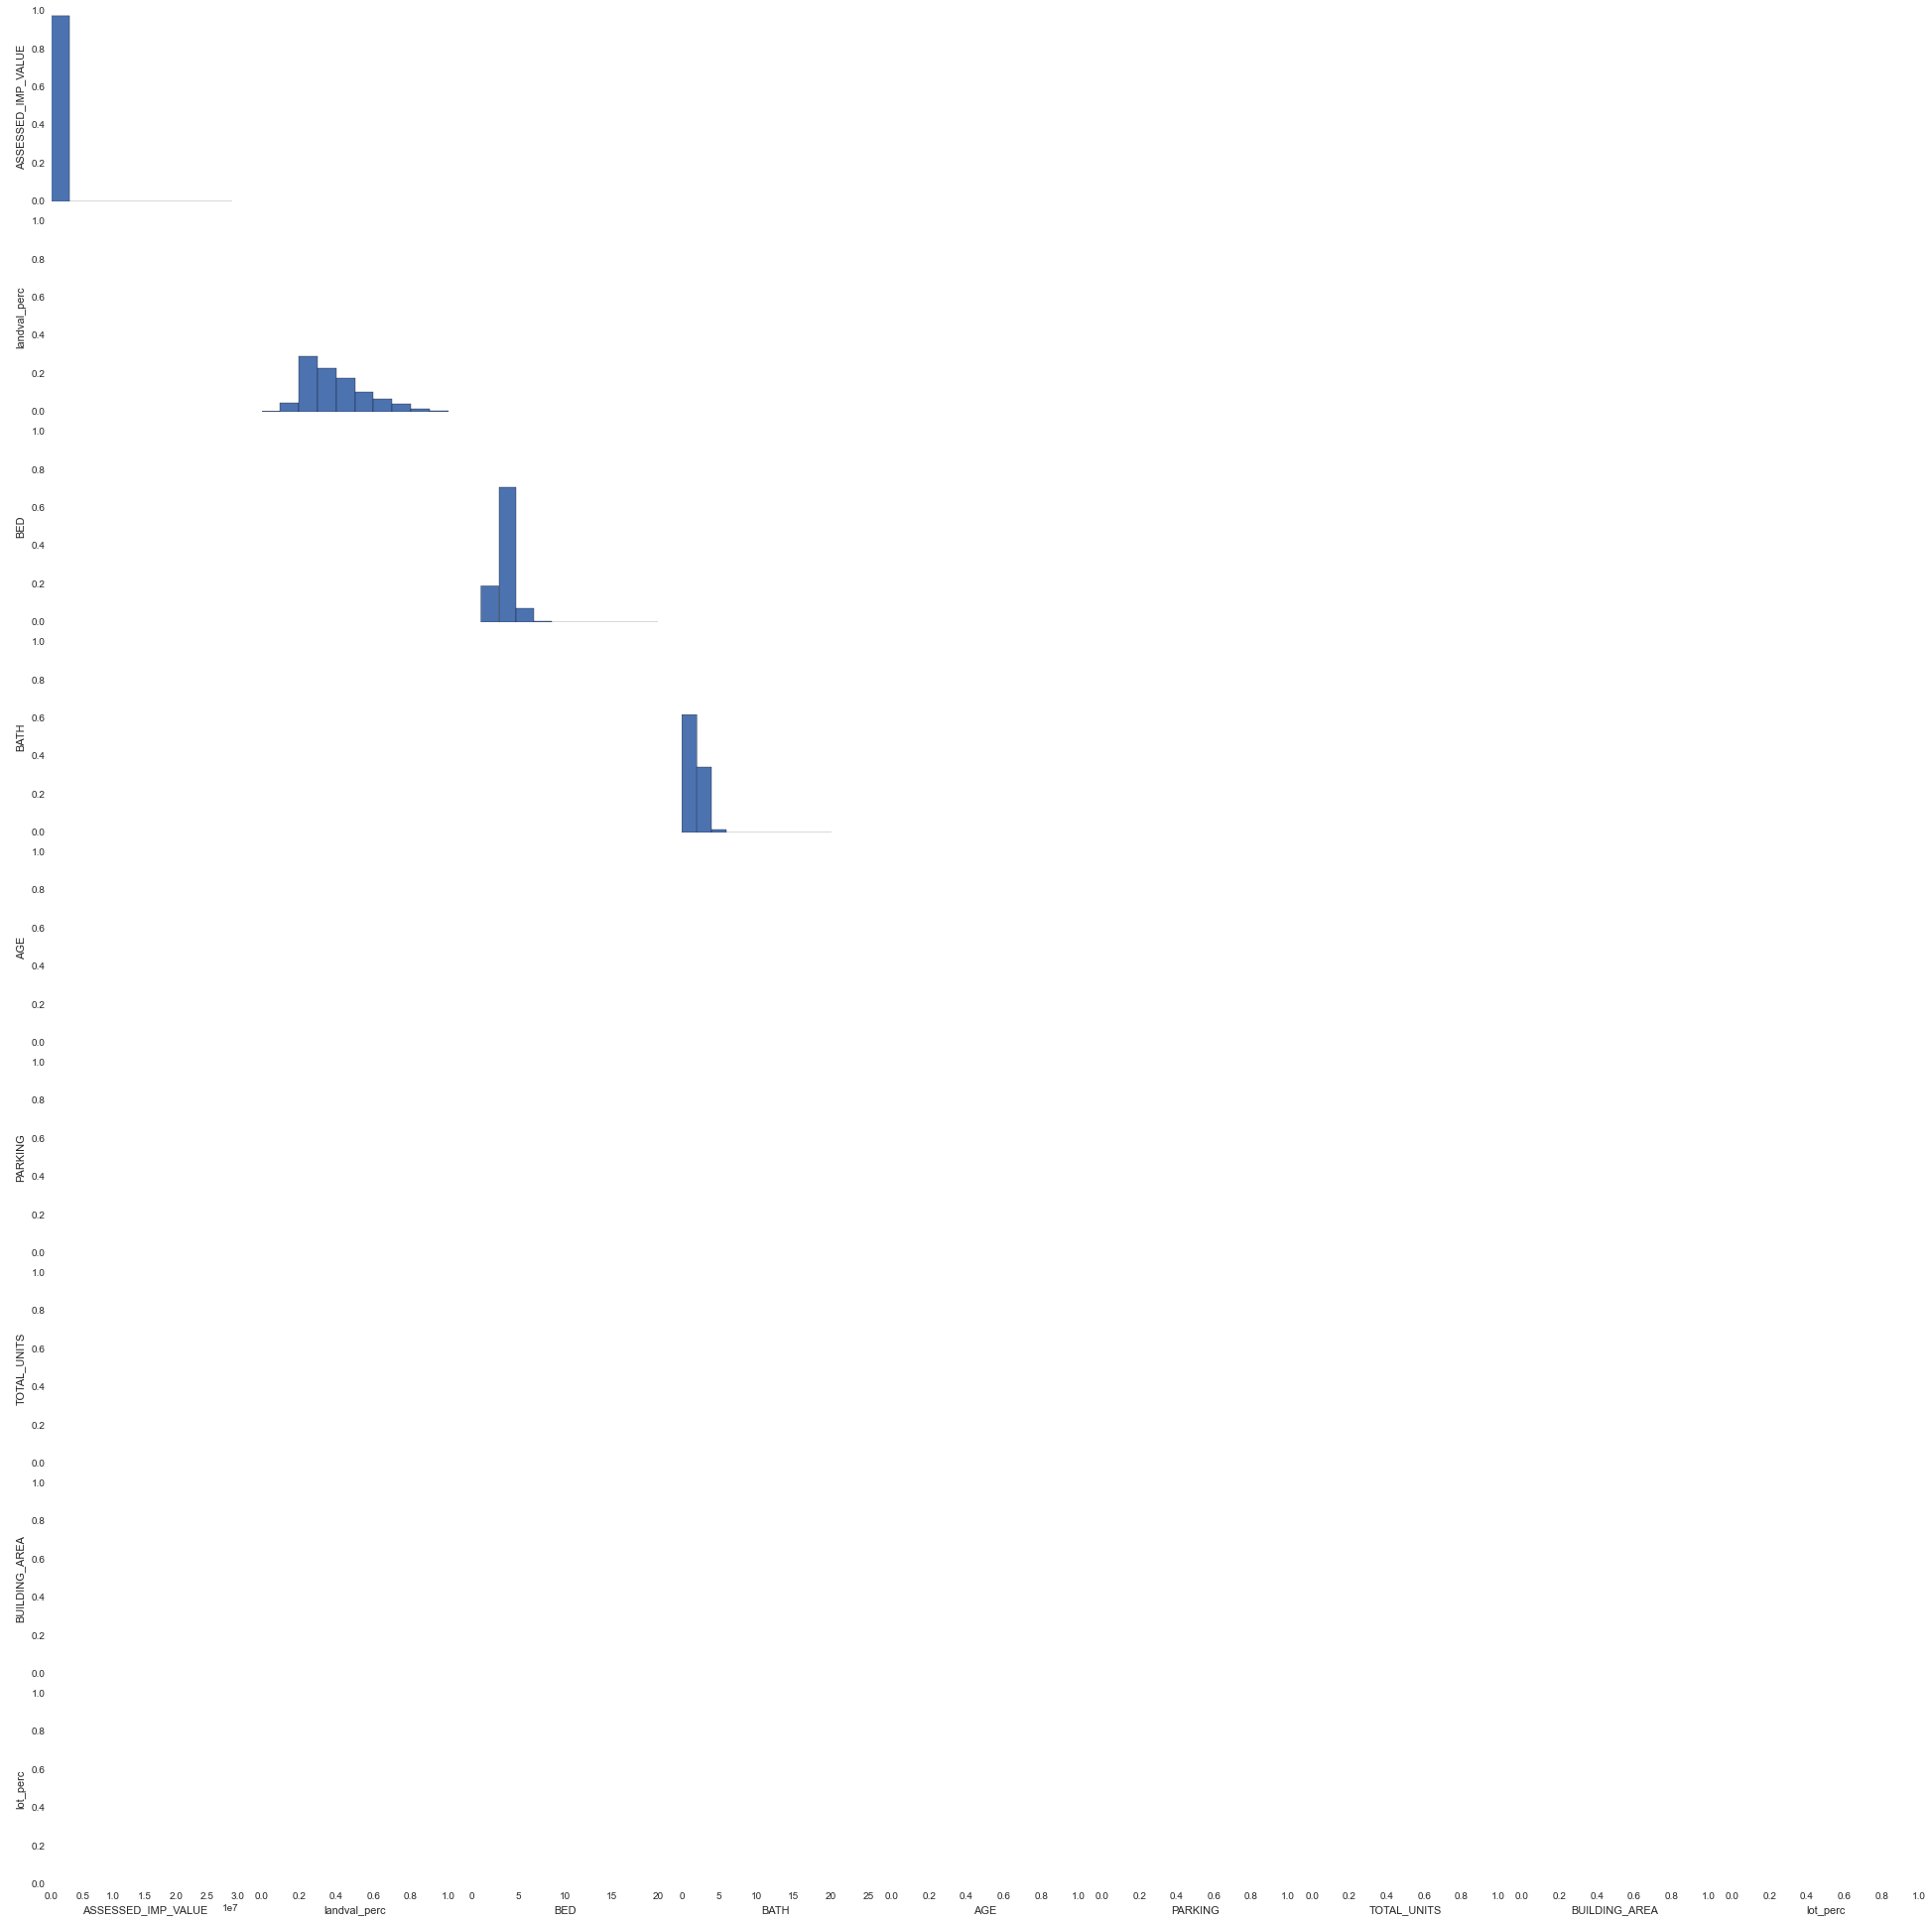

In [21]:
sns.pairplot(X)

In [20]:
X[X.lot_perc < 0]

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,BUILDING_AREA,lot_perc
6,435372,0.121593,4,2.0,103,2,NaN,0,2,NaN,NaN,1260,-0.4
18,800000,0.300000,2,1.5,79,1,NaN,0,0,NaN,NaN,3585,-0.434
75,304816,0.051746,6,4.0,60,2,NaN,0,2,NaN,NaN,2806,-0.1224
107,489213,0.185946,9,5.5,99,2,NaN,0,4,NaN,NaN,4186,-0.1627778
144,43735,0.573248,1,3.0,116,2,NaN,0,0,NaN,NaN,3097,-0.2388
146,172145,0.299596,5,4.0,59,2,NaN,0,4,NaN,NaN,3514,-0.4056
153,355762,0.280522,4,1.0,113,2,G,0,0,NaN,NaN,1428,-0.1424
163,69492,0.326023,5,2.0,40,2,G,0,0,NaN,NaN,2374,-0.2661333
164,27035,0.647901,4,2.0,113,2,NaN,0,4,NaN,NaN,2264,-0.2042553
166,83265,0.125275,4,2.0,32,2,NaN,0,2,NaN,NaN,1894,-0.007446809


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pca_pipe = Pipeline((
                     ( 'scl', StandardScaler() ),
                     ( 'pca', PCA(whiten = True) )
                    ))

X_pca = pca_pipe.fit(X)

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\utils\validation.py:278: UserWarning: StandardScaler assumes floating point values as input, got object
  "got %s" % (estimator, X.dtype))


ValueError: could not convert string to float: Y

#Caveats about Data
I can't distinguish between SFR, MFR, CONDO, TOWNHOUSE etc because property_type is badly populated. I do have this internally, and can even use a classification problem to label my data, but going to roll with it. This means BUILDING_AREA and LOT_SIZE metrics might be off.

###Processing

Disregarded these columns:
 - property_type
 - zip

Removed properties with:
 - no land value
 - no imp_value
 - no bedrooms
 - no bathrooms
 - building_area
 
Imputation